# 지하철 시간대별 데이터 시각화

In [1]:
DIR_PATH = './Data/'

In [2]:
def func(x):
    return x **2

a = [1, 2, 3, 4]
a = list(map(func, a)) # 각 숫자의 제곱
print(a)
data =['1', '2', '3', '4']
data = list(map(int, data)) # 문자를 정수로 변환
print(data)

[1, 4, 9, 16]
[1, 2, 3, 4]


##### 문자형과 정수형이 다른 결과값을 보임

### 시간대별 지하철 이용 인원 수

In [3]:
import csv

result = []
total_number = 0

with open(DIR_PATH + 'subwaytime.csv', encoding='utf-8') as f:
    data = csv.reader(f)
    next(data) #2줄의 헤더 정보를 건너뜀
    next(data)
    
    for row in data:
        row[4:] = map(int, row[4:]) # 문자열을 숫자로 변경
        total_number += row[4]
        result.append(row[4])

print('총 지하철 역의 수:', len(result))
print('새벽 4시 승차인원: {:,}'.format(total_number))

총 지하철 역의 수: 615
새벽 4시 승차인원: 135,398


### 새벽 4시 지하철 승차 전체 인원

새벽 4시 승차 인원수: 135,398
최대 승차역: 구로, 인원수:11,784


<BarContainer object of 615 artists>

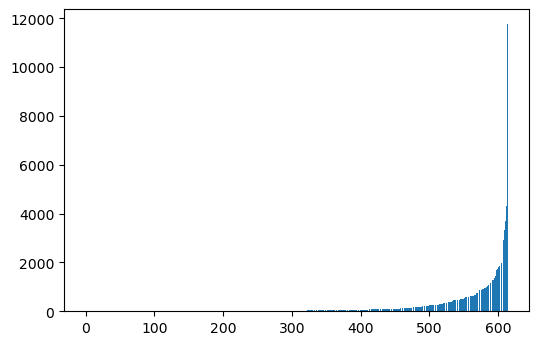

In [4]:
import csv
import matplotlib.pyplot as plt

with open(DIR_PATH + 'subwaytime.csv', encoding='utf-8') as f:
    data = csv.reader(f)
    next(data) # 2줄의 헤더 정보 건너뜀
    next(data)
    
    result = []
    total_number = 0
    max_num = 0
    max_station = ''

    for row in data:
        row[4:] = map(int, row[4:])
        total_number += row[4]
        result.append(row[4])
        if(row[4] > max_num):
            max_num = row[4]
            max_station = row[3]

print('새벽 4시 승차 인원수: {0:,}'.format(total_number))
print('최대 승차역: {0}, 인원수:{1:,}'.format(max_station, max_num))

result.sort() # 오름 차순으로 정렬, 내림차순: result.sort(reverse=True)
plt.figure(dpi=100)
plt.bar(range(len(result)), result)

### 출근 시간대(7~9시까지) 모든 역의 승차 인원을 계산하고 막대 그래프로 출력 하시오.
    • 7시, 8시, 9시 승차: index=10, 12, 14

최대 승차 인원역: 신림(2호선) 638,753


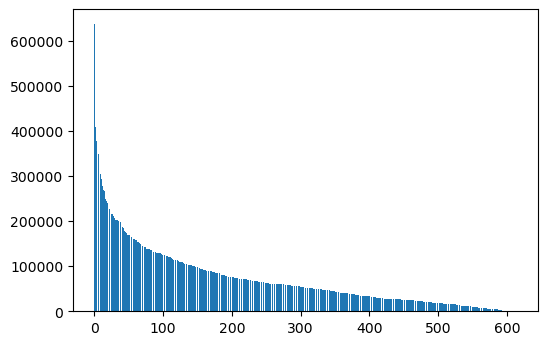

In [5]:
import csv
import matplotlib.pyplot as plt

with open(DIR_PATH + 'subwaytime.csv', encoding='utf-8') as f:
    data = csv.reader(f)
    next(data) # 2줄의 헤더 정보 건너뜀
    next(data)
    
    result = []
    total_number = 0
    max_num = 0
    max_station = ''

    for row in data:
        row[4:] = map(int, row[4:])
        row_sum = sum(row[10:15:2]) # index 10, 12, 14
        # row_sum = row[10] + row[12] + row[14]
        result.append(row_sum)
        if row_sum > max_num:
            max_num = row_sum
            max_station = row[3] + '(' + row[1] + ')'

print('최대 승차 인원역: {0} {1:,}'.format(max_station, max_num))
result.sort(reverse=True)
plt.figure(dpi=100)
plt.bar(range(len(result)), result)
plt.show()

### 시간대별 가장 많이 승차하는 역 정보 분석
##### § 시간대: 새벽 4시 ~ 다음날 새벽2시
    • 총 23개의 데이터
    • 새벽 3시는 지하철 운행 안함

4시 : 구로 : 11,784, 5시 : 신림 : 38,809, 6시 : 신림 : 73,523, 7시 : 신림 : 188,110, 
8시 : 신림 : 281,017, 9시 : 신림 : 169,626, 10시 : 신림 : 91,989, 11시 : 신림 : 77,496, 
12시 : 잠실(송파구청) : 84,383, 13시 : 강남 : 95,697, 14시 : 강남 : 106,394, 15시 : 강남 : 131,625, 
16시 : 강남 : 154,526, 17시 : 강남 : 231,839, 18시 : 강남 : 314,775, 19시 : 강남 : 196,425, 
20시 : 강남 : 155,347, 21시 : 강남 : 180,108, 22시 : 강남 : 176,473, 23시 : 강남 : 81,016, 
0시 : 강남 : 12,407, 1시 : 건대입구 : 8, 2시 : 동묘앞 : 1


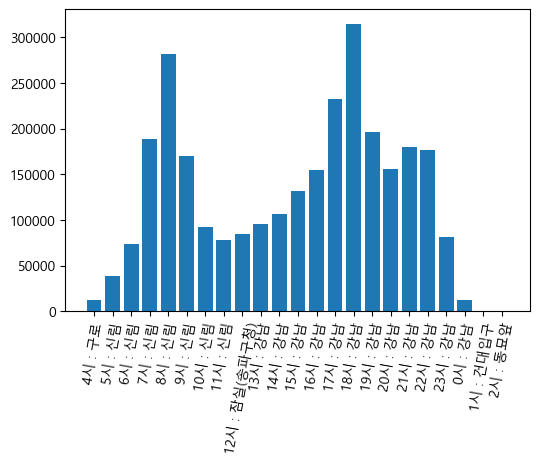

In [13]:
import csv
import matplotlib.pyplot as plt
import platform

with open(DIR_PATH + 'subwaytime.csv', encoding='utf-8') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    
    max =[0] * 23 # 새벽 3시는 지하철 운행 안함
    max_station = [''] * 23
    xtick_list = []
    
    for i in range(4, 27):
        n = i % 24 # 4, 5, 6, ... 23, 0, 1, 2시로 표시
        xtick_list.append(str(n))
    
    for row in data:
        row[4:] = map(int, row[4:])
        for j in range(23):
            a = row[j * 2 + 4] # j=0: data[j*2+4]의 값을 max[0]에 저장하기 위함
            if a > max[j]:
                max[j] = a
                max_station[j] = xtick_list[j] + '시 : ' + row[3] # 4시: 구로

    for i in range(len(max)):
        if i == len(max) - 1 :
            print('{0} : {1:,}'.format(max_station[i], max[i]))
        else :
            print('{0} : {1:,}'.format(max_station[i], max[i]), end=', ')
        if (i+1) % 4 == 0: # 한 줄에 6개씩 출력
            print()

if(platform.system() == 'Windows'):
    plt.rc('font', family = 'Malgun Gothic')
else:
    plt.rc('font', family = 'AppleGothic')
    
plt.figure(dpi=100)
plt.bar(range(23), max)
plt.xticks(range(23), max_station, rotation=80)
plt.show()

### 모든 지하철역에서 시간대별 승하차 인원?
#### § 시간대별 전체 지하철역의 승차, 하차 인원 분포
    • 전체 역의 시간대별 승하차 인원 누적 계산
    • y축: 1e7 (1 x 107), 천 만명 단위

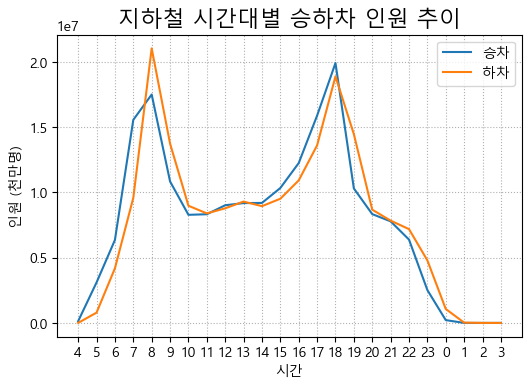

In [18]:
import csv
import matplotlib.pyplot as plt
import platform

f = open(DIR_PATH + 'subwaytime.csv', encoding='utf-8')
data = csv.reader(f)
next(data)
next(data)
s_in = [0] * 24 # 승차 인원 저장 리스트
s_out = [0] * 24 # 하차 인원 저장 리스트

for row in data:
    row[4:] = map(int, row[4:])
    for i in range(24):
        s_in[i] += row[4+i*2]
        s_out[i] += row[5+i*2]

if (platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

xtick_list = []
for i in range(4, 28):
    n = i % 24
    xtick_list.append(str(n))

plt.figure(dpi=100)
plt.title('지하철 시간대별 승하차 인원 추이', size=16)
plt.grid(linestyle=':') # 그리드 라인 표시

plt.plot(s_in, label='승차')
plt.plot(s_out, label='하차')
         
plt.legend()
plt.xticks(range(24), xtick_list)
plt.xlabel('시간')
plt.ylabel('인원 (천만명)')
plt.show()